# Supervised Learning

- Machine identifies objects by training over massive number of examples (adequate data?).

- Machine Learning operates on large chunk of data.

- Supervised learning depends on labeling and classification. 

# Comparing the Traditional Statistics with Machine Learning

- **Traditional Statistics**
- Build a model to estimate a relationship.
Fit the model to data perhaps with a subset of a data reserved for out of sample data.

- Make a case for the validity of the data by means of a story.

- **Machine Learning**
- Let data identify features for classification.

- Add parameters to traditional statistical methods.

- Evaluate the results though a primary focus on.

# Unsupervised Learning

- Unsupervised learning trains the model without labels.

- Prior focus is on finding patterns.

- Using **Principal Component Analysis**

- Clustering

- Graphical Networks


In [33]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [34]:
file_name = 'ReturnsData_Daily.csv'
df = pd.read_csv(file_name, low_memory=False, index_col=0) # set the first column (date) as index
df.index=pd.to_datetime(df.index) # set index (i.e. date) as a datetime object
display(df)

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA,SP500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,-0.051966,-0.065617,-0.060338,-0.034869,-0.050505,-0.031161,-0.032457,-0.062376,-0.054291,...,0.006512,-0.029480,NaN,-0.034632,-0.008430,0.088754,NaN,-0.001606,NaN,-0.009549
2000-01-04,NaN,-0.031111,-0.033708,-0.023493,-0.059355,-0.042553,-0.001462,-0.051118,-0.062987,-0.074074,...,-0.037893,-0.017586,NaN,0.000000,-0.005313,-0.084310,NaN,-0.033780,NaN,-0.038345
2000-01-05,NaN,0.004587,-0.002907,-0.006173,0.010974,0.003704,-0.005857,-0.008418,-0.046828,-0.036500,...,0.042267,0.054516,NaN,0.017937,0.034188,0.014634,NaN,0.010544,NaN,0.001922
2000-01-06,NaN,0.047184,0.032070,0.014197,0.071913,0.065191,0.008837,0.044143,0.042789,0.019201,...,0.008295,0.049383,NaN,0.042584,0.002066,-0.086538,NaN,-0.033498,NaN,0.000956
2000-01-07,NaN,0.001453,0.022599,0.018373,-0.013924,-0.002309,-0.013139,0.017886,0.003799,0.031059,...,0.095978,-0.000735,NaN,0.017606,-0.018557,0.047368,NaN,0.013068,NaN,0.027090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.026556,-0.040379,-0.044819,-0.033391,-0.039532,-0.040415,-0.015222,-0.040764,-0.033011,-0.019628,...,-0.016209,-0.047109,-0.049641,-0.041557,-0.042615,-0.017652,-0.021366,-0.020158,-0.011060,-0.025855
2020-06-25,0.024723,0.029696,0.032004,0.034862,0.038219,0.036804,0.014863,0.047856,0.045854,0.039191,...,0.009226,0.015056,0.023249,0.017914,0.015558,0.013276,0.005863,0.012636,-0.017947,0.010959
2020-06-26,-0.040303,-0.051855,-0.052300,-0.054818,-0.063511,-0.058846,-0.023433,-0.074169,-0.086480,-0.035663,...,-0.018023,-0.034315,-0.028917,-0.030826,-0.031489,-0.030726,-0.054514,-0.020016,-0.029033,-0.024227


In [35]:
for name in df.columns:
    print(name)

FRC
PNC
USB
JPM
BAC
C
RY
WFC
GS
MS
HSBC
JNJ
PFE
MRK
XOM
RDS
CVS
BP
AAPL
GOOG
MSFT
BABA
SP500


In [36]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
FRC,2404.0,0.000734,0.017196,-0.150909,-0.007268,0.000689,0.008937,0.128799
PNC,5156.0,0.000568,0.023833,-0.413958,-0.008310,0.000269,0.009010,0.370909
USB,5156.0,0.000495,0.021910,-0.181653,-0.007648,0.000538,0.008207,0.228412
JPM,5156.0,0.000539,0.024902,-0.207274,-0.008974,0.000235,0.009709,0.250967
BAC,5156.0,0.000519,0.029287,-0.289694,-0.009532,0.000287,0.010111,0.352691
C,5156.0,0.000161,0.031202,-0.390244,-0.009944,0.000000,0.010086,0.578249
RY,5156.0,0.000625,0.015948,-0.150961,-0.006350,0.000656,0.007730,0.163435
WFC,5156.0,0.000457,0.024632,-0.238223,-0.007965,0.000155,0.008319,0.327645
GS,5156.0,0.000468,0.023717,-0.189596,-0.010136,0.000335,0.011087,0.264678
MS,5156.0,0.000511,0.031907,-0.258929,-0.011930,0.000230,0.012532,0.869835


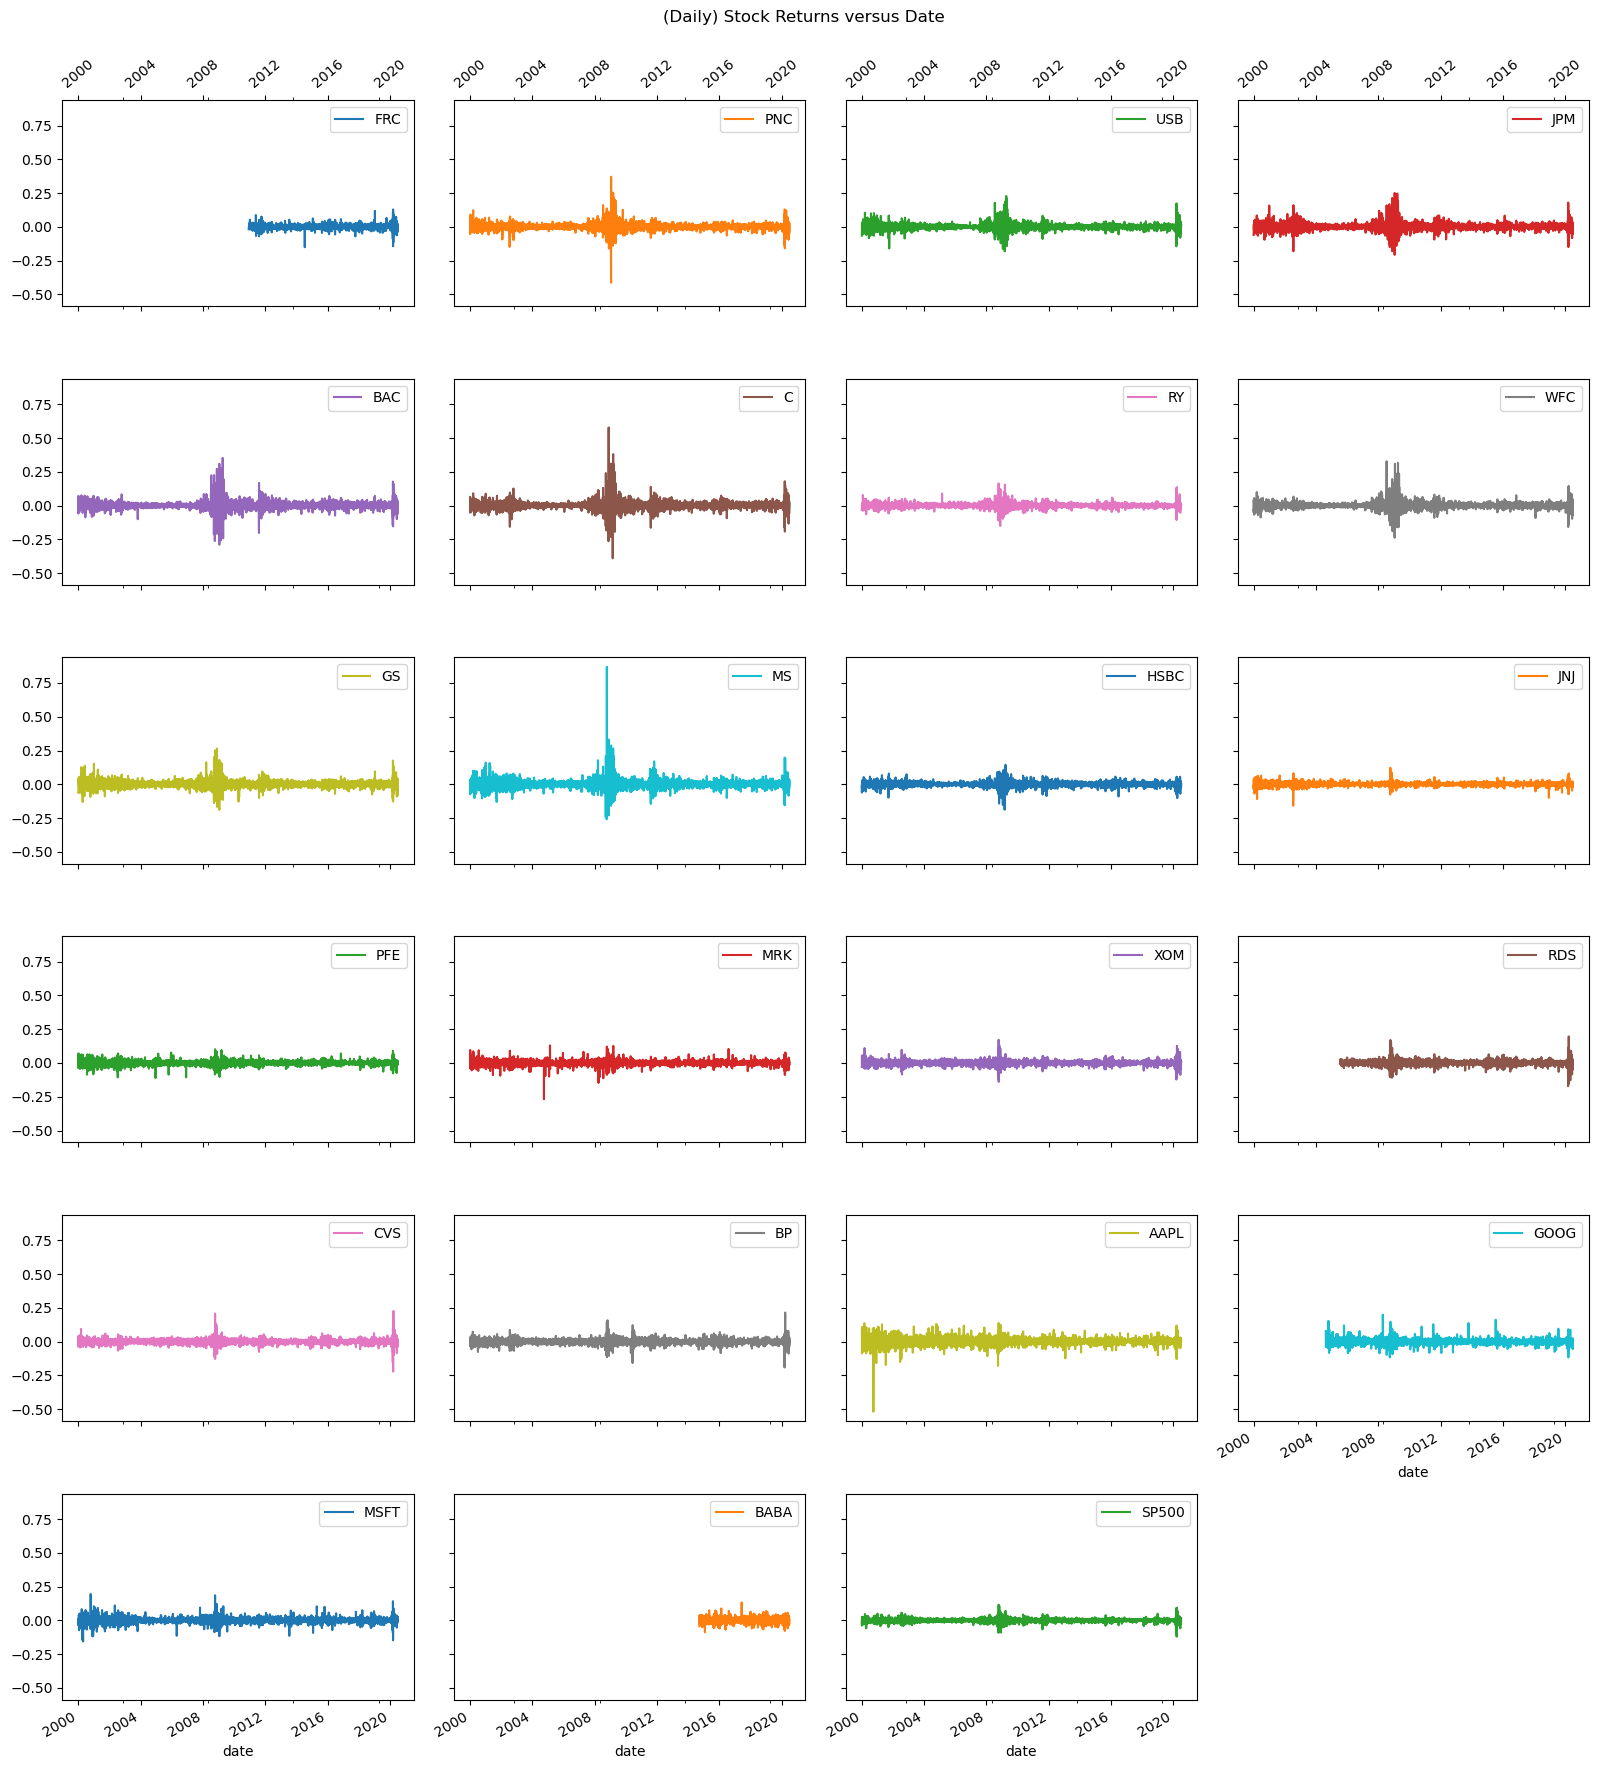

In [37]:
## Plot the Daily Stock Returns versus Date

n = len(df.columns) 
col = 4 #specify the number of columns for the plot
row = int(np.ceil(n/col)) #specify the number of rows
fig_hei = row * 3 #specify height for the plot
fig_wid = col * 4 #specify width for the lot

ax = df.plot(subplots=True, layout=(row ,col), figsize=(fig_wid, fig_hei),
             sharey=True, sharex=True, #share y and x axis for the subplots
             title = '(Daily) Stock Returns versus Date')

for i in range(col): #add x tickers to the top of the plot
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40) 
    
fig = ax[0,0].get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.93) #to indirectly adjust the location of the title

plt.show()

### Address Missing Data

Notice that there are missing data in the dataset for the given time period (January 2000 to June 2020). We want to make sure that the data we work with have the same start and end dates. 

Some options for how to deal with missing data include:
- Select the subset that includes all stocks, i.e. dropping row data such that all stocks have the same start and end dates;
- Select the subset that includes all dates, i.e. dropping column data to exclude stocks with missing data;
- Fill in the missing data from other sources or by backfilling

In this notebook, we will drop the BABA stock and then drop the row (i.e. date) data such that the rest of the stocks have the same start and end dates.

In [38]:
df = df.drop('BABA', axis=1) #drop BABA
df = df.dropna()

display(df)

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,SP500
date,,,,,,,,,,,,,,,,,,,,,
2010-12-10,-0.018266,-0.014618,0.023607,0.015192,0.011858,0.017600,0.006356,0.006651,0.012136,0.008985,...,0.015604,0.008971,0.002500,0.011044,0.004385,0.010516,0.002510,0.001200,0.009601,0.006002
2010-12-13,-0.000365,-0.011043,-0.010208,0.001931,-0.020313,0.008386,0.002105,-0.001652,0.005995,-0.000371,...,0.009988,0.013615,0.002494,0.006462,0.015397,0.004394,0.003463,0.004069,-0.003475,0.000048
2010-12-14,-0.003285,0.006833,-0.009167,-0.017345,-0.011164,-0.024948,-0.006494,-0.013319,-0.012686,-0.011507,...,-0.004654,0.012465,-0.002488,0.008254,0.000113,0.023256,-0.004290,0.000488,0.013764,0.000911
2010-12-15,0.005126,-0.030624,-0.005397,-0.014219,-0.008871,-0.021322,-0.005383,-0.000922,-0.012670,-0.016147,...,-0.001753,0.003010,-0.004572,-0.018344,-0.004186,-0.013051,0.000218,-0.007749,0.008327,-0.005122
2010-12-16,0.007286,-0.002391,0.011628,-0.004912,0.018714,-0.000763,-0.003286,0.007721,-0.004540,-0.007252,...,0.008197,0.004910,0.005150,0.002008,0.011930,-0.002508,0.002778,0.002389,0.004937,0.006185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.026556,-0.040379,-0.044819,-0.033391,-0.039532,-0.040415,-0.015222,-0.040764,-0.033011,-0.019628,...,-0.017699,-0.016209,-0.047109,-0.049641,-0.041557,-0.042615,-0.017652,-0.021366,-0.020158,-0.025855
2020-06-25,0.024723,0.029696,0.032004,0.034862,0.038219,0.036804,0.014863,0.047856,0.045854,0.039191,...,0.004039,0.009226,0.015056,0.023249,0.017914,0.015558,0.013276,0.005863,0.012636,0.010959
2020-06-26,-0.040303,-0.051855,-0.052300,-0.054818,-0.063511,-0.058846,-0.023433,-0.074169,-0.086480,-0.035663,...,-0.008663,-0.018023,-0.034315,-0.028917,-0.030826,-0.031489,-0.030726,-0.054514,-0.020016,-0.024227


In [39]:
#Any missing data in the dataframe now?
df.isnull().values.any()

False

### Changing Data Frequency

We can convert our daily return to returns in a different frequency via the *resample* function. 

In this notebook, we will be using weekly return data, so we will need to convert our daily returns to weekly returns. To do so, one can simply multiply the total returns (i.e. daily returns plus 1) within a week and then subtract the resulting product by 1.

Note that in our example dataset (see the dataframe above), the week of 2010-12-12 has only one date of the returns while the week of 2020-07-05 have only two dates of the returns, so we would like to remove the weekly returns data for that two weeks to account for the "missing" data.

In [40]:
# Convert daily return data to weekly return
df_week = (df+1).resample('W').prod() - 1
df_week = df_week.drop(df_week.index[[0]]) #remove first week
df_week = df_week.drop(df_week.index[[-1]]) #remove the last week
df_week

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,SP500
date,,,,,,,,,,,,,,,,,,,,,
2010-12-19,0.023713,-0.035768,-0.009452,-0.042481,-0.017969,-0.014676,-0.025839,-0.010241,-0.026297,-0.026345,...,5.874812e-04,0.024285,-0.000138,-0.010153,0.016776,0.000231,0.000156,-0.002381,0.020574,0.002830
2010-12-26,0.037063,0.027521,0.031297,0.060752,0.038983,-0.004256,0.010413,0.034380,0.021703,0.044588,...,3.405802e-02,-0.005208,0.014271,0.020826,0.024748,0.017341,0.009327,0.022733,0.014246,0.010339
2011-01-02,0.000687,0.010149,-0.000004,0.008080,0.021440,0.010684,0.018083,0.000001,0.003342,-0.007296,...,-5.676861e-03,-0.006889,-0.001093,0.016748,0.006285,0.003864,-0.003215,-0.016981,-0.013780,0.000692
2011-01-09,0.048763,0.020092,-0.032628,0.029924,0.068216,0.044398,0.000573,0.016457,0.015045,0.036384,...,4.740118e-02,0.036347,0.033781,-0.015423,-0.000658,0.043242,0.042038,0.037830,0.024722,0.011020
2011-01-16,0.026523,0.038476,0.049062,0.029103,0.070175,0.038461,0.038366,0.039682,0.025251,0.027659,...,-7.686505e-07,-0.083533,0.029767,0.036045,0.017984,0.068794,0.036771,0.012555,-0.010489,0.017099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.111717,0.090144,0.079866,0.087626,0.064430,0.086395,0.101580,0.095159,0.098984,0.101420,...,1.839991e-02,0.056960,0.019506,-0.008995,0.015730,0.006964,-0.002980,0.014351,-0.001417,0.030066
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,-5.760602e-02,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555,0.049147
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-6.223929e-02,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886,-0.047783


In [41]:
SP500 = df_week[['SP500']]
display(SP500)

,SP500
date,
2010-12-19,0.002830
2010-12-26,0.010339
2011-01-02,0.000692
2011-01-09,0.011020
2011-01-16,0.017099
...,...
2020-05-31,0.030066
2020-06-07,0.049147
2020-06-14,-0.047783


In [42]:
# Since we have S&P500 return data we want to remove it to create stock portfolios
data = df_week.drop('SP500', axis=1)

In [43]:
## Read and Edit data into the right format
file_name = 'WTB3MS.csv' #datafile downloaded from FRED
df = pd.read_csv(file_name)

df['DATE']=pd.to_datetime(df['DATE']) #set the DATE column as datetime object
df['WTB3MS'] = pd.to_numeric(df['WTB3MS'], errors='coerce') #set the return column as numeric

RET_data=pd.DataFrame(columns=['RET'], index=df.DATE) #create a new dataframe 
RET_data['RET'] = (df['WTB3MS'].values/100 + 1) ** (1/52) - 1 #edit the unit of the return data

RET_data_weekly = (RET_data['RET']+1).resample('W').prod() - 1 #convert the data to the same weekly frequency as above
TBill = pd.DataFrame(columns=['T-Bill'], index=RET_data_weekly.index)
TBill['T-Bill'] = RET_data_weekly

ind = (TBill.index >= df_week.index[[0]][0])*(TBill.index <= df_week.index[[-1]][0])
TBill = TBill[ind] #keep the same start and end date as the stock returns data
display(TBill)

,T-Bill
DATE,
2010-12-19,0.000027
2010-12-26,0.000027
2011-01-02,0.000027
2011-01-09,0.000027
2011-01-16,0.000029
...,...
2020-05-31,0.000029
2020-06-07,0.000029
2020-06-14,0.000033


In [44]:
start_date = '2010-12-19'
end_date = '2020-06-28'

In [45]:
ind = (data.index >= start_date)*(data.index <= end_date)
data = data[ind]
display(data)

SP500 = SP500[ind]
display(SP500)

TBill = TBill[ind]
display(TBill)

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,JNJ,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT
date,,,,,,,,,,,,,,,,,,,,,
2010-12-19,0.023713,-0.035768,-0.009452,-0.042481,-0.017969,-0.014676,-0.025839,-0.010241,-0.026297,-0.026345,...,0.010177,5.874812e-04,0.024285,-0.000138,-0.010153,0.016776,0.000231,0.000156,-0.002381,0.020574
2010-12-26,0.037063,0.027521,0.031297,0.060752,0.038983,-0.004256,0.010413,0.034380,0.021703,0.044588,...,-0.004636,3.405802e-02,-0.005208,0.014271,0.020826,0.024748,0.017341,0.009327,0.022733,0.014246
2011-01-02,0.000687,0.010149,-0.000004,0.008080,0.021440,0.010684,0.018083,0.000001,0.003342,-0.007296,...,-0.006426,-5.676861e-03,-0.006889,-0.001093,0.016748,0.006285,0.003864,-0.003215,-0.016981,-0.013780
2011-01-09,0.048763,0.020092,-0.032628,0.029924,0.068216,0.044398,0.000573,0.016457,0.015045,0.036384,...,0.012127,4.740118e-02,0.036347,0.033781,-0.015423,-0.000658,0.043242,0.042038,0.037830,0.024722
2011-01-16,0.026523,0.038476,0.049062,0.029103,0.070175,0.038461,0.038366,0.039682,0.025251,0.027659,...,-0.000798,-7.686505e-07,-0.083533,0.029767,0.036045,0.017984,0.068794,0.036771,0.012555,-0.010489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.111717,0.090144,0.079866,0.087626,0.064430,0.086395,0.101580,0.095159,0.098984,0.101420,...,0.030339,1.839991e-02,0.056960,0.019506,-0.008995,0.015730,0.006964,-0.002980,0.014351,-0.001417
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,-0.009747,-5.760602e-02,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-0.034964,-6.223929e-02,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886


,SP500
date,
2010-12-19,0.002830
2010-12-26,0.010339
2011-01-02,0.000692
2011-01-09,0.011020
2011-01-16,0.017099
...,...
2020-05-31,0.030066
2020-06-07,0.049147
2020-06-14,-0.047783


,T-Bill
DATE,
2010-12-19,0.000027
2010-12-26,0.000027
2011-01-02,0.000027
2011-01-09,0.000027
2011-01-16,0.000029
...,...
2020-05-31,0.000029
2020-06-07,0.000029
2020-06-14,0.000033


In [46]:
data = df_week.drop('SP500', axis=1)
data.head()


,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,JNJ,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT
date,,,,,,,,,,,,,,,,,,,,,
2010-12-19,0.023713,-0.035768,-0.009452,-0.042481,-0.017969,-0.014676,-0.025839,-0.010241,-0.026297,-0.026345,...,0.010177,5.874812e-04,0.024285,-0.000138,-0.010153,0.016776,0.000231,0.000156,-0.002381,0.020574
2010-12-26,0.037063,0.027521,0.031297,0.060752,0.038983,-0.004256,0.010413,0.034380,0.021703,0.044588,...,-0.004636,3.405802e-02,-0.005208,0.014271,0.020826,0.024748,0.017341,0.009327,0.022733,0.014246
2011-01-02,0.000687,0.010149,-0.000004,0.008080,0.021440,0.010684,0.018083,0.000001,0.003342,-0.007296,...,-0.006426,-5.676861e-03,-0.006889,-0.001093,0.016748,0.006285,0.003864,-0.003215,-0.016981,-0.013780
2011-01-09,0.048763,0.020092,-0.032628,0.029924,0.068216,0.044398,0.000573,0.016457,0.015045,0.036384,...,0.012127,4.740118e-02,0.036347,0.033781,-0.015423,-0.000658,0.043242,0.042038,0.037830,0.024722
2011-01-16,0.026523,0.038476,0.049062,0.029103,0.070175,0.038461,0.038366,0.039682,0.025251,0.027659,...,-0.000798,-7.686505e-07,-0.083533,0.029767,0.036045,0.017984,0.068794,0.036771,0.012555,-0.010489


In [47]:
Freq = 52 # frequency factor (given weekly data, it is 52)

# Functions for annualizing returns and standard deviation
def ann_ret(x):
    return (x+1)**Freq-1
def ann_std(x):
    return x*np.sqrt(Freq)

# Function used to find the Annualized geometric mean of x [note: x is weekly data]
def ann_geo_mean(x):
    n = len(x)
    return np.exp(np.sum(np.log(1+x)) * Freq / n) - 1

# Function used to find the Annualized Sharpe Ratio of x
def ann_sr(x, rf):    
    n = len(x)
    ret_expected = np.sum(x-rf)/n
    ret_avg = np.sum(x)/n
    std_dev = np.sqrt( np.sum( (x - ret_avg)**2 ) / n )
    annu_ret_expected = (ret_expected+1)**Freq-1
    annu_std_dev = std_dev * np.sqrt(Freq)
    return annu_ret_expected/annu_std_dev

# Function used to find the Maximum drawdown
def mdd(x):
    wealth = (x+1).cumprod() #x is a return vector
    cummax = wealth.cummax() #determine cumulative maximum value
    drawdown = wealth/cummax - 1 #calculate drawdown vector
    return drawdown.min()



In [48]:
round_to = 2
Stat = pd.DataFrame(index = data.columns)
Stat['Geo Mean(Annu, %)'] = np.round(data.apply(ann_geo_mean)*100, round_to)
Stat['Volatility(Annu,%)'] = np.round(ann_std(data.std())*100, round_to)
Stat['Sharpe Ratio (Annu)'] = np.round(data.apply(ann_sr, rf = TBill['T-Bill']), round_to)
Stat['Max Drawdown(%)'] = np.round(data.apply(mdd)*100, round_to)
Stat['Arithmetic Mean'] = np.round(ann_ret(data.mean())*100, round_to)

display(Stat)

,"Geo Mean(Annu, %)","Volatility(Annu,%)",Sharpe Ratio (Annu),Max Drawdown(%),Arithmetic Mean
FRC,15.80,25.96,0.73,-33.06,19.74
PNC,8.10,26.09,0.43,-46.63,11.84
USB,5.80,24.09,0.34,-48.13,8.90
JPM,11.67,26.71,0.56,-39.64,15.71
BAC,7.69,33.47,0.39,-66.00,13.84
C,1.44,34.43,0.20,-53.90,7.63
RY,6.68,19.96,0.41,-35.26,8.83
WFC,1.12,26.95,0.16,-60.90,4.84
GS,2.72,29.02,0.22,-48.89,7.11
MS,7.82,33.69,0.40,-58.41,14.10


In [49]:
def LR(X, y):
    reg = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
    return reg.coef_, reg.intercept_

In [50]:
ex_ret = data.sub(TBill['T-Bill'], axis=0)
mkt_ex_ret = SP500.sub(TBill['T-Bill'], axis=0)

n = len(ex_ret.columns)
beta = np.zeros(n)
alpha = np.zeros(n)

for i in range(n):
    beta[i],alpha[i] = LR(mkt_ex_ret.values, ex_ret[ex_ret.columns[i]].values)

AlphaBeta = pd.DataFrame(index = data.columns)
AlphaBeta['Alpha(Annu, %)'] = np.round(ann_ret(alpha)*100, 3)
AlphaBeta['Beta'] = np.round(beta, 3)
display(AlphaBeta) 


,"Alpha(Annu, %)",Beta
FRC,7.489,1.025
PNC,-1.788,1.245
USB,-3.559,1.159
JPM,1.262,1.280
BAC,-2.551,1.501
C,-9.963,1.730
RY,-1.336,0.924
WFC,-7.866,1.235
GS,-7.370,1.397
MS,-3.301,1.602


In [51]:
data_cov_mat = data.cov()
data_cov_mat_ann = data_cov_mat * Freq
display(data_cov_mat_ann)

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,JNJ,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT
FRC,0.067394,0.048483,0.041604,0.044259,0.056190,0.056529,0.025321,0.043375,0.047998,0.052201,...,0.016048,0.018337,0.015403,0.026568,0.025501,0.030534,0.028785,0.024591,0.024426,0.020148
PNC,0.048483,0.068073,0.054789,0.057737,0.070704,0.072872,0.031488,0.058332,0.058108,0.066115,...,0.016859,0.018880,0.017163,0.034044,0.031634,0.036236,0.035160,0.027142,0.029431,0.026041
USB,0.041604,0.054789,0.058019,0.052261,0.062535,0.066834,0.030775,0.056775,0.051910,0.057925,...,0.015190,0.017428,0.016092,0.034508,0.034279,0.034912,0.037040,0.026079,0.028350,0.023695
JPM,0.044259,0.057737,0.052261,0.071323,0.077028,0.080352,0.036494,0.058268,0.066143,0.075419,...,0.018416,0.021772,0.020279,0.036391,0.036036,0.039826,0.039332,0.026889,0.029785,0.026996
BAC,0.056190,0.070704,0.062535,0.077028,0.112034,0.100327,0.040154,0.070144,0.079817,0.092802,...,0.019271,0.023409,0.020823,0.039844,0.038170,0.043126,0.043702,0.035045,0.035470,0.032068
C,0.056529,0.072872,0.066834,0.080352,0.100327,0.118556,0.047438,0.073440,0.083850,0.096354,...,0.023472,0.025944,0.023583,0.047695,0.049569,0.052551,0.055695,0.040685,0.041170,0.036210
RY,0.025321,0.031488,0.030775,0.036494,0.040154,0.047438,0.039836,0.033824,0.037890,0.043829,...,0.014066,0.016921,0.014051,0.028034,0.034236,0.032854,0.035539,0.022394,0.020764,0.018586
WFC,0.043375,0.058332,0.056775,0.058268,0.070144,0.073440,0.033824,0.072635,0.058434,0.065217,...,0.015980,0.020202,0.018656,0.037094,0.037283,0.036993,0.039870,0.025704,0.029264,0.023911
GS,0.047998,0.058108,0.051910,0.066143,0.079817,0.083850,0.037890,0.058434,0.084221,0.084882,...,0.019434,0.021991,0.019246,0.038091,0.037906,0.042005,0.042436,0.031803,0.030605,0.028498
MS,0.052201,0.066115,0.057925,0.075419,0.092802,0.096354,0.043829,0.065217,0.084882,0.113531,...,0.021808,0.026725,0.022088,0.044100,0.045940,0.048876,0.049878,0.033037,0.036736,0.034966


### Check for factorability

A matrix that is **factorable** should include several sizable correlations.If none of the correlations is significantly different from zero, then a parsimonious explanation CANNOT be found of the covariance structure and hence no factor analysis can be done.Thus if there are no correlations significantly different from zero, no interesting studies such as factor analysis etc. can be done on the variables.

There are two methods to check the factorability of the dataset:
- Bartlett’s Test
    - Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix;
    - If the test found statistically insignificant, you should NOT employ a factor analysis.
- Kaiser-Meyer-Olkin (KMO) Test
    - KMO Test measures the suitability of data for factor analysis and determines the adequacy for each observed variable as well as for the complete model;
    - It estimates the proportion of variance among all the observed variable. Lower proportion is more suitable for factor analysis;
    - KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

Reference: https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [53]:
# Bartlett's Test

chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(p_value)
if(p_value < 0.05):
    print("This test was statistically significant")

0.0
This test was statistically significant


In [56]:
kmo_all, kmo_model = calculate_kmo(data)
print(kmo_model)
if(kmo_model > 0.5):
    print("Factor analysis can be done as the KMO is over 0.6")

0.9586358459465093
Factor analysis can be done as the KMO is over 0.6


# Estimating parameters of Markowitz Model

In [57]:
start_date_train = '2010-12-19'
end_date_train   = '2020-06-28'

In [60]:
ind = (data.index >= start_date_train)*(data.index <= end_date_train)
data_train = data[ind].copy()
SP500_train = SP500[ind].copy()
TBill_train = TBill[ind].copy()

In [98]:
# Get the mean and the cov mat
data_train_mean = data_train.mean()
data_train_cov = data_train.cov()

def eReturn(w, data_mean = data_train_mean):
    """
    Computes the expected return

    w: weight
    data_mean: matrix of data mean

    returns the expected return given the weight and the data_mean
    """

    exp = w @ data_mean
    return exp

def p_std(w, cov=data_train_cov):
    """
    Computes the portfolio standard deviation

    w: Weight
    cov: Covariance Matrix

    returns the standard deviation of a portfolio
    """

    p_std = w @ cov @ w
    return np.sqrt(p_std)

def markowitzPortOpt(r, cov = data_train_cov, data_mean = data_train_mean, silent = False):
    
    #Constraints
    def constraint1(w):
        return np.sum(w) - 1 # budget constraint
    def constraint2(w):
        return 1.0 - np.sum(w) # budget constraint
    def constraint3(w):
        return w # nonnegative constraint
    def constraint4(w):
        diff = eReturn(w) - r
        return diff # return constraint 
    def constraint5(w):
        diff = 0.25*np.ones(len(data_train.columns)) - w
        return diff # investing more than 25 percent of our wealth 
    con1 = {'type': 'ineq', 'fun': constraint1}
    con2 = {'type': 'ineq', 'fun': constraint2}
    con3 = {'type': 'ineq', 'fun': constraint3}
    con4 = {'type': 'ineq', 'fun': constraint4}
    con5 = {'type': 'ineq', 'fun': constraint5}

    cons = ([con1,con2,con3,con4, con5])

    w0 = np.ones(len(data_train.columns))

    sol = minimize(p_std, w0, method='SLSQP', constraints=cons)

    if(not silent):
        print("Solution to the Markowitz Problem with r =  ", round(r*100,3), "%:")
        print(sol)
        print("")
    elif (not sol['success']): #check if the optimizer exit successfully
        print("WARNING:  the optimizer did NOT exit successfully!!")
        
    return sol


In [92]:
sol = markowitzPortOpt(r = 0.001, cov = data_train_cov, data_mean = data_train_mean, silent = False)

Solution to the Markowitz Problem with r =   0.1 %:
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.019097228818082405
       x: [-1.767e-16  1.779e-17 ...  2.708e-02  6.299e-02]
     nit: 23
     jac: [ 1.970e-02  2.261e-02 ...  1.885e-02  1.902e-02]
    nfev: 507
    njev: 23



In [94]:
sol = markowitzPortOpt(r = 0.0025, cov = data_train_cov, data_mean = data_train_mean, silent = False)
print(np.round(sol['x'], 2))

Solution to the Markowitz Problem with r =   0.25 %:
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.019348854504461027
       x: [ 1.220e-02 -2.737e-17 ...  3.627e-02  1.012e-01]
     nit: 14
     jac: [ 2.038e-02  2.323e-02 ...  2.040e-02  2.050e-02]
    nfev: 308
    njev: 14

[ 0.01 -0.   -0.   -0.   -0.   -0.    0.09 -0.    0.    0.    0.13  0.25
  0.14  0.18 -0.    0.   -0.    0.    0.06  0.04  0.1 ]


## 5. Constructing Sub-Model for Each Point on Efficient Frontier <a id="5"></a>

We will iterate the above *MarkowitzPortOpt* function to get a set of points on efficient frontier.

In [95]:
numR = 14

# Setting target return r-bar
r_bar = np.array([i for i in range(numR-3)])*0.0003 + 0.002 #using same increment for the first several r-bars
r_bar = np.append(r_bar,np.array([0.00505,0.0051,0.00515])) #using different increments for the last several r-bars

In [96]:
if (len(r_bar) != numR):
    numR = len(r_bar)
print("Number of targeted returns (or r-bar) specified is: ", numR)

Number of targeted returns (or r-bar) specified is:  14


In [101]:
# Two lists to record the volatility and expected return for each portfilio 
port_vol = []
port_return = []

# A matrix storing the portfolio alloaction
alloc_r = np.zeros((len(data_train.columns),numR))

# Solve the Markowitz problem for each r-bar and output the results
for i in range(numR):
    r = r_bar[i]
    print("* For the case r-bar = ", round(r*100,3), "%:")
    sol = markowitzPortOpt(r, silent = True)
    
    if (not sol['success']): #check if the optimizer exit successfully
        print("NOTE: solution to this r-bar will be dropped!")
    else: #only keeping the r-bar that has sucessful optmization
        print(sol['message'])
        alloc_r[:,i] = sol['x']
        port_vol.append(sol['fun'])
        port_return.append(eReturn(sol['x']))
    print("")
    
port_vol = np.asarray(port_vol)
port_return = np.asarray(port_return)

num_rbar = len(port_vol) #update the number of r-bar recorded/kept
print("The number of recoreded the efficient frontier points is:", num_rbar)

* For the case r-bar =  0.2 %:
Optimization terminated successfully

* For the case r-bar =  0.23 %:
Optimization terminated successfully

* For the case r-bar =  0.26 %:
Optimization terminated successfully

* For the case r-bar =  0.29 %:
Optimization terminated successfully

* For the case r-bar =  0.32 %:
Optimization terminated successfully

* For the case r-bar =  0.35 %:
Optimization terminated successfully

* For the case r-bar =  0.38 %:
Optimization terminated successfully

* For the case r-bar =  0.41 %:
Optimization terminated successfully

* For the case r-bar =  0.44 %:
NOTE: solution to this r-bar will be dropped!

* For the case r-bar =  0.47 %:
NOTE: solution to this r-bar will be dropped!

* For the case r-bar =  0.5 %:
NOTE: solution to this r-bar will be dropped!

* For the case r-bar =  0.505 %:
NOTE: solution to this r-bar will be dropped!

* For the case r-bar =  0.51 %:
NOTE: solution to this r-bar will be dropped!

* For the case r-bar =  0.515 %:
NOTE: solutio

In [100]:
# Display the optimal allocation for each specified target return
DF_Alloc_R = pd.DataFrame(alloc_r)
DF_Alloc_R.index = data_train.columns
DF_Alloc_R.columns = [str(round(ann_ret(r)*100, 1))+"%" for r in r_bar]
DF_Alloc_R = DF_Alloc_R.loc[:,(DF_Alloc_R!=0).any(axis=0)] #drop the r-bar solution(s) that failed the opt. problem

print('Optimal allocation (in %) for specified (annualized) target return:')
display(np.round(DF_Alloc_R*100, 1)) #allocation in % and round (to the 1st decimal)

Optimal allocation (in %) for specified (annualized) target return:


,10.9%,12.7%,14.5%,16.3%,18.1%,19.9%,21.8%,23.7%
FRC,0.3,0.3,1.8,3.7,5.4,6.1,8.9,16.7
PNC,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
USB,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
JPM,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
BAC,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
C,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
RY,10.3,10.4,9.1,7.8,5.6,1.7,-0.0,0.0
WFC,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
GS,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
MS,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0


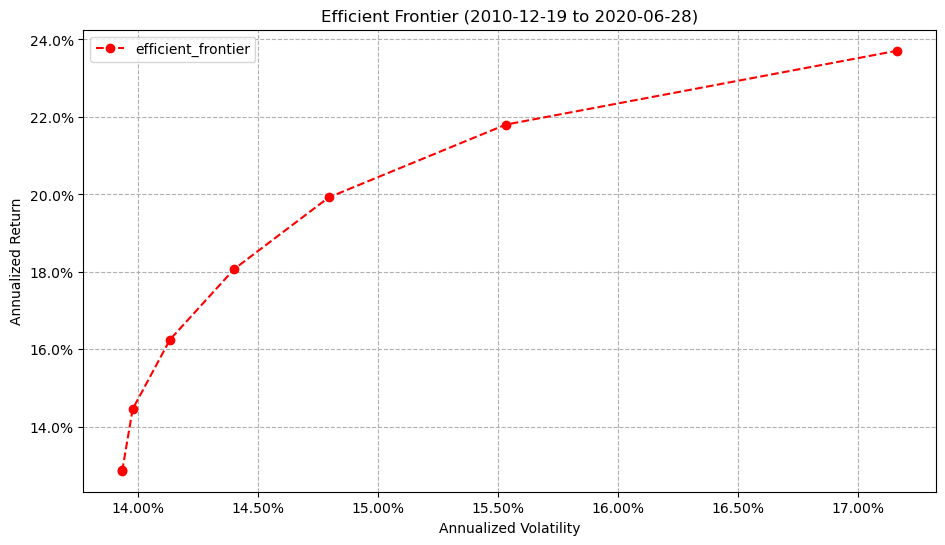

In [102]:
# Plotting efficient frontier
plt.rcParams['figure.figsize'] = (11, 6)
plt.plot(ann_std(port_vol), ann_ret(port_return), 'ro--', label='efficient_frontier')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.grid(True, linestyle='--')
plt.legend()
plt.title('Efficient Frontier ('+str(start_date_train)+' to '+str(end_date_train)+')')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

In [107]:
# Function to compute the annualized sharpe ratio for the portfolio given portfolio weight
# Note that it returns the -1 * Annualized Sharpe Ratio 
def AnnSR(w, data = data_train, rf = TBill_train['T-Bill'].mean()):
    excess_ret = data @ w - rf 
    AnnSR = ann_ret(excess_ret.mean())/ann_std(p_std(w))
    return AnnSR


# Function to find the optimal portfolio that maximize the Sharpe ratio 
# Returns the optimal solution
def MaxSR(data = data_train, rf = TBill_train['T-Bill'].mean(), silent = False):
    
    #Objective Function
    def SR(w):
        excess_ret = data @ w - rf 
        SR = (excess_ret.mean())/(p_std(w))
        return -SR
    
    n = len(data.columns)
    
    #Bounds
    bnds = tuple((0,1) for i in range(n)) # nonnegativity constraint

    # Constraints
    def constraint1(w):
        return np.sum(w) - 1.0 # budget constraint   
    cons = {'type': 'eq', 'fun': constraint1}
    
    # Initial x0
    w0 = np.array(np.ones(n))
    
    # Solve the problem
    sol = minimize(SR, w0, method='SLSQP', bounds=bnds, constraints=cons)
    
    # Whether the solution will be printed
    if(not silent):
        print("Solution to the Max Sharpe Ratio Problem is:")
        print(sol)
        print("")
    elif (not sol['success']): #check if the optimizer exist successfully
        print("WARNING:  the optimizer did NOT exit successfully!!")
        
    return sol

In [110]:
# Find the optimal portfolio that maximize Sharpe Ratio
sol = MaxSR()
w_SR = sol['x'] #the portfolio weight with highest Sharpe Ratio

# Calculate the volatility and expected return for the optimal portfolio
opt_vol = p_std(sol['x'])
opt_return = eReturn(sol['x'])
sr = AnnSR(sol['x'])

# Print (annualized) return, volatiltiy and Sharpe ratio information
print("* The expected return (annualized) for the optimal portfolio is ", ann_ret(opt_return) )
print("* The volatility (annualized) for the optimal portfolio is ", ann_std(opt_vol) )
print("* The Sharpe ratio (annualized) for the optimal portfolio is ", sr)
print()

# Display the optimal allocation after adding in the allocation correspond to the max SR
DF_Alloc_R['maxSR'] = w_SR 
print('Optimal allocation (in %) for specified target return:')
display(np.round(DF_Alloc_R*100, 1)) #allocation in % and round (to the 1st decimal)

Solution to the Max Sharpe Ratio Problem is:
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.1760018161554724
       x: [ 6.817e-02  5.768e-17 ...  6.006e-17  4.622e-01]
     nit: 8
     jac: [-5.538e-03  6.358e-02 ...  5.650e-03 -4.794e-03]
    nfev: 176
    njev: 8

* The expected return (annualized) for the optimal portfolio is  0.2506774636956324
* The volatility (annualized) for the optimal portfolio is  0.17183415114082118
* The Sharpe ratio (annualized) for the optimal portfolio is  1.4148950345496925

Optimal allocation (in %) for specified target return:


,10.9%,12.7%,14.5%,16.3%,18.1%,19.9%,21.8%,23.7%,maxSR
FRC,0.3,0.3,1.8,3.7,5.4,6.1,8.9,16.7,6.8
PNC,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
USB,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
JPM,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
BAC,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
C,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
RY,10.3,10.4,9.1,7.8,5.6,1.7,-0.0,0.0,0.0
WFC,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0
GS,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
MS,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0


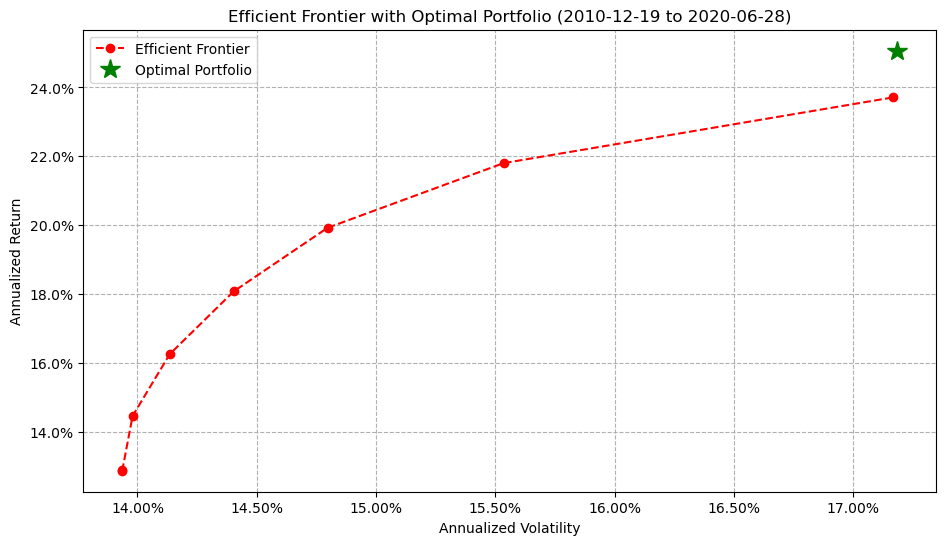

In [111]:
# Plotting efficient frontier and mark the portfolio with maximum Sharpe ratio
plt.rcParams['figure.figsize'] = (11, 6)
plt.plot(ann_std(port_vol), ann_ret(port_return), 'ro--', label='Efficient Frontier') #plot efficient frontier
plt.plot(ann_std(opt_vol), ann_ret(opt_return), 'g*', markersize=15, label='Optimal Portfolio') #plot max SR portfolio
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.grid(True, linestyle='--')
plt.legend()
plt.title('Efficient Frontier with Optimal Portfolio ('+str(start_date_train)+' to '+str(end_date_train)+')')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

In [112]:
# Join the stock returns dataframe with T-Bill return dataframe
data_train_with_rf = data_train.copy()
data_train_with_rf = data_train_with_rf.join(TBill_train)

In [113]:
# Get the mean and covariance matrix of the training data
data_train_with_rf_mean = data_train_with_rf.mean()
data_train_with_rf_cov_mat = data_train_with_rf.cov()

# Function to compute the expected return for the portfolio
def EReturn_with_rf(w):
    EReturn = w @ data_train_with_rf_mean
    return EReturn

# Function to compute the portfolio standard deviation
def PVol_with_rf(w):
    pvar = w @ data_train_with_rf_cov_mat @ w
    return np.sqrt(pvar)

# Function to solve for the optimal solution to the Markowitz Portfolio Optimization Problem 
# with specified target return r
def MarkPortOpt_with_rf(r, silent = False):

    # Constraints
    def constraint1(w):
        return np.sum(w) - 1.0 # budget constraint   
    def constraint2(w):
        return 1.0 - np.sum(w) # budget constraint
    def constraint3(w):
        return w[:-1] # nonnegative constraint placed on stock returns only
    def constraint4(w):
        diff = EReturn_with_rf(w) - r
        return diff # return constraint    
    con1 = {'type': 'ineq', 'fun': constraint1}
    con2 = {'type': 'ineq', 'fun': constraint2}
    con3 = {'type': 'ineq', 'fun': constraint3}
    con4 = {'type': 'ineq', 'fun': constraint4}
    cons = ([con1,con2,con3,con4])

    # Initial x0
    w0 = np.ones(len(data_train_with_rf.columns))

    # Solve the problem
    sol = minimize(PVol_with_rf, w0, method='SLSQP',constraints=cons)
    
    # Whether the solution will be printed
    if(not silent):
        print("Solution to the Markowitz Problem with r =  ", round(r*100,3), "%:")
        print(sol)
        print("")
    elif (not sol['success']): #check if the optimizer exist successfully
        print("WARNING:  the optimizer did NOT exit successfully!!")
        
    return sol

In [114]:
# Two lists to record the volatility and expected return for each portfilio 
port_vol_with_rf = []
port_return_with_rf = []

# Solve the Markowitz problem for each r-bar and output the results
for i in range(numR):
    r = r_bar[i]
    print("* For the case r-bar = ", round(r*100,3), "%:")
    sol = MarkPortOpt_with_rf(r, silent = True)
    
    if (not sol['success']): #check if the optimizer exist successfully
        print("NOTE: solution to this r-bar will be dropped!")
    else: #only keeping the r-bar that has sucessful optmization
        print(sol['message'])
        port_vol_with_rf.append(sol['fun'])
        port_return_with_rf.append(EReturn_with_rf(sol['x']))
    print("")
    
port_vol_with_rf = np.asarray(port_vol_with_rf)
port_return_with_rf = np.asarray(port_return_with_rf)

num_rbar = len(port_vol_with_rf) #update the number of r-bar recorded/kept
print("The number of recoreded the efficient frontier points is:", num_rbar)

* For the case r-bar =  0.2 %:
Optimization terminated successfully

* For the case r-bar =  0.23 %:
Optimization terminated successfully

* For the case r-bar =  0.26 %:
Optimization terminated successfully

* For the case r-bar =  0.29 %:
Optimization terminated successfully

* For the case r-bar =  0.32 %:
Optimization terminated successfully

* For the case r-bar =  0.35 %:
Optimization terminated successfully

* For the case r-bar =  0.38 %:
Optimization terminated successfully

* For the case r-bar =  0.41 %:
Optimization terminated successfully

* For the case r-bar =  0.44 %:
Optimization terminated successfully

* For the case r-bar =  0.47 %:
Optimization terminated successfully

* For the case r-bar =  0.5 %:
Optimization terminated successfully

* For the case r-bar =  0.505 %:
Optimization terminated successfully

* For the case r-bar =  0.51 %:
Optimization terminated successfully

* For the case r-bar =  0.515 %:
Optimization terminated successfully

The number of recore

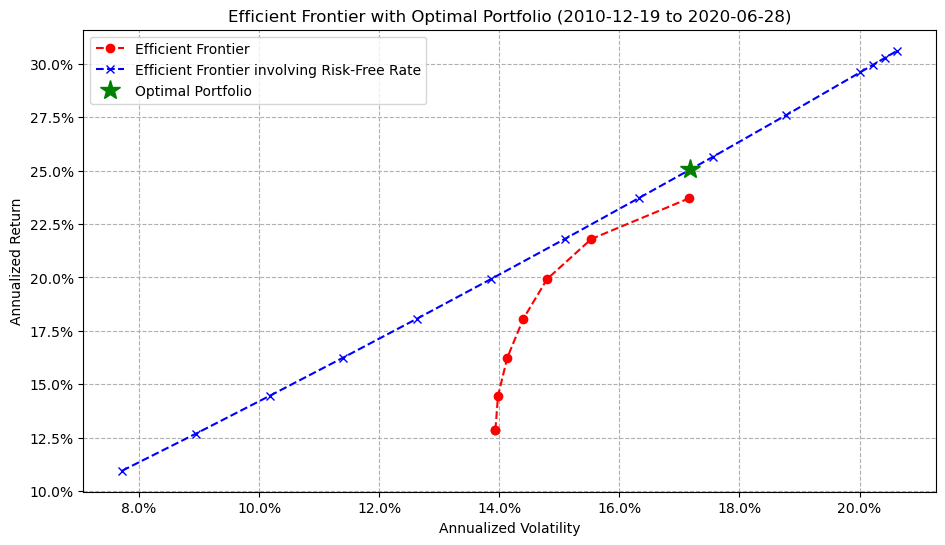

In [115]:
# Plotting efficient frontiers and mark the portfolio with maximum Sharpe ratio
plt.rcParams['figure.figsize'] = (11, 6)
plt.plot(ann_std(port_vol), ann_ret(port_return), 'ro--', label='Efficient Frontier') #plot efficient frontier
plt.plot(ann_std(port_vol_with_rf), ann_ret(port_return_with_rf), 'bx--', 
         label='Efficient Frontier involving Risk-Free Rate') #plot efficient frontier involving risk-free rate
plt.plot(ann_std(opt_vol), ann_ret(opt_return), 'g*', markersize=15, label='Optimal Portfolio') #plot max SR portfolio
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.grid(True, linestyle='--')
plt.legend()
plt.title('Efficient Frontier with Optimal Portfolio ('+str(start_date_train)+' to '+str(end_date_train)+')')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

In [117]:
# Calculate the portfolio weight (90% max Sharpe + 10% risk-free rate)
w_port1 = np.append(0.9 * w_SR, 0.1)

# Calculate the portfolio risk
risk_port1 = np.sqrt( w_port1 @ data_train_with_rf_cov_mat @ w_port1)

print('The new portfolio risk (annualized) is:', ann_std(risk_port1))
print('The portfolio risk (annualized) for the max Sharpe point was:', ann_std(p_std(w_SR)))

The new portfolio risk (annualized) is: 0.15465196783237173
The portfolio risk (annualized) for the max Sharpe point was: 0.17183415114082118


In [119]:
# Calculate the portfolio weight (borrowing at risk-free rate and levering max Sharpe point)
w_port2 = np.append(1.2*w_SR, -0.2)

# Calculate the portfolio risk
risk_port2 = np.sqrt( w_port2 @ data_train_with_rf_cov_mat @ w_port2)

print('The new portfolio risk (annualized) is:', ann_std(risk_port2))
print('The portfolio risk (annualized) for the max Sharpe point was:', ann_std(p_std(w_SR)))

The new portfolio risk (annualized) is: 0.20619871192561592
The portfolio risk (annualized) for the max Sharpe point was: 0.17183415114082118


In [120]:
###########################################   CAN BE CHANGED  #############################################

# Specify the start and end date for the back test  (can also use BT_startdate = 'YYYY-MM-DD') 
# CAUTION: Make sure that the date is within our specified time period from Section 1
BT_startdate = str(data.index[0].date())
BT_enddate = str(data.index[-1].date())

###########################################   CAN BE CHANGED  #############################################

In [121]:
# Trim dataset to have the specified start and end dates for the historical back test
data_BT = data[BT_startdate:BT_enddate].copy()
SP500_BT = SP500[BT_startdate:BT_enddate].copy()
TBill_BT = TBill[BT_startdate:BT_enddate].copy()

In [122]:
# Functions to calculate the portfolio return for back-testing given portfolio weight
# Return the portfolio return over the full back-testing period
# Buy-and-hold strategy
def portRet_BH(w): 
    n = data_BT.shape[0]
    PR = np.zeros(n) 
    X = w * 1 #initial wealth assume to be 1
    for i in range(n):
        W = (1+data_BT.iloc[i]) @ X #wealth after each period
        PR[i] = (W - np.sum(X))/np.sum(X) #calculate and record portfolio return for that period
        X = (1+data_BT.iloc[i]) * X #how much of the wealth is invested in each asset
    return PR

# Function to display the summary statistics of the back test results
# It takes in the portfolio returns dataframe and returns the mean and standard deviation of the portfolio returns
def DisplaySummary_BT(PR, n_dec = 2):
    col_names = PR.columns
    
    # Compute and display summary statistics for each portfolio
    print('Summary statistic of various allocations for the back test (from '+
          str(BT_startdate)+' to '+str(BT_enddate)+'):')
    PR_mean = PR.mean()
    PR_std = PR.std()
    BT = pd.DataFrame(index = col_names)
    BT['Geo Mean(Annu,%)'] = np.round( PR.apply(ann_geo_mean) *100, n_dec)
    BT['Std(Annu,%)'] = np.round( ann_std(PR.std()) *100, n_dec)
    BT['Sharpe Ratio (Annu)'] = np.round( PR.apply(ann_sr, rf=TBill_BT['T-Bill']), n_dec)
    BT['Max Drawdown(%)'] = np.round(PR.apply(mdd)*100, n_dec)
    display(BT)
    
    return PR_mean,PR_std

In [123]:
# Add the equal weighted portfolio to our portfolio allocation dataframe
n_stocks = len(data.columns)
w_EQ = np.array(np.ones(n_stocks))/n_stocks
DF_Alloc_R['Equal'] = w_EQ

In [124]:
# Calculate the weekly portfolio return for each asset mix in df_alloc_r 
# (note: takes a bit time for this block to run)
col_names = DF_Alloc_R.columns
PR_BH = pd.DataFrame(index = data_BT.index, columns = col_names)
for i in range(len(col_names)):
    w = DF_Alloc_R.iloc[:,i].values
    PR_BH[col_names[i]] = portRet_BH(w)  

In [125]:
# Display Results for Buy-and_Hold strategy
print('Using Buy-and-Hold strategy: ')
PR_BH_mean,PR_BH_std = DisplaySummary_BT(PR_BH)

Using Buy-and-Hold strategy: 
Summary statistic of various allocations for the back test (from 2010-12-19 to 2020-06-28):


,"Geo Mean(Annu,%)","Std(Annu,%)",Sharpe Ratio (Annu),Max Drawdown(%)
10.9%,13.30,14.07,0.98,-22.95
12.7%,13.29,14.07,0.98,-22.95
14.5%,14.75,14.20,1.07,-23.51
16.3%,16.25,14.39,1.17,-23.93
18.1%,17.58,14.65,1.24,-24.26
19.9%,19.14,15.07,1.31,-24.55
21.8%,20.52,16.02,1.33,-25.66
23.7%,21.39,17.50,1.29,-27.43
maxSR,23.05,17.53,1.38,-26.21
Equal,10.81,17.67,0.67,-33.65


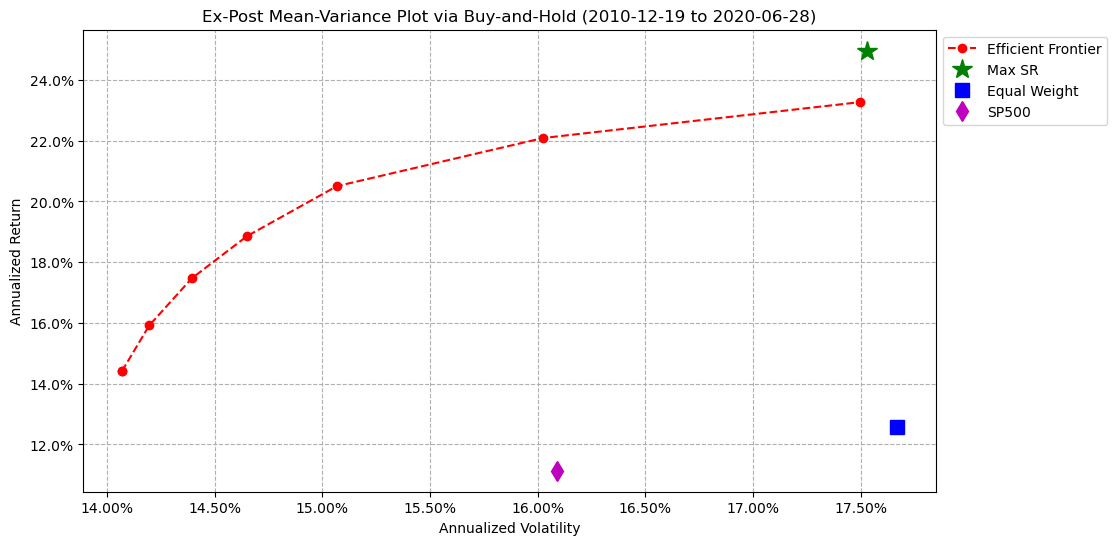

In [126]:
# Plotting Ex-Post efficient frontier and mark the various portfolios
plt.rcParams['figure.figsize'] = (11, 6)
# Plot efficient frontier
num_rbar = np.sum(PR_BH.columns.str.contains('%', case=False))
plt.plot(ann_std(PR_BH_std[:num_rbar]), ann_ret(PR_BH_mean[:num_rbar]), 'ro--' , label='Efficient Frontier')
# Plot optimal portfolio
plt.plot(ann_std(PR_BH_std['maxSR']), ann_ret(PR_BH_mean['maxSR']), 'g*', markersize=15, label='Max SR')
# Plot equal weighted portfolio
plt.plot(ann_std(PR_BH_std['Equal']), ann_ret(PR_BH_mean['Equal']), 'bs', markersize=10, label='Equal Weight')
# Plot SP500 
plt.plot(ann_std(SP500_BT.std()), ann_ret(SP500_BT.mean()), 'md', markersize=10, label='SP500')
# Customize the plot
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.grid(True, linestyle='--')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Ex-Post Mean-Variance Plot via Buy-and-Hold ('+str(BT_startdate)+' to '+str(BT_enddate)+')')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

## 9. Interpreting Output Recommendations  <a id="9"></a>

Looking at the efficient frontier and its corresponding dataframe with asset allocations, we can clearly observe that:

- Portfolio on the top right end of efficient frontier consists of only one or two stocks

- Portfolio on the bottom left end of efficient frontier tend to be more conservative and with greater diversification

There is great advantage of solving Markowitz Problem IF we have excellent estimates of future performance – motivation to search for improving forecasts.